# Model Training

The main goal of this notebook is to experiment with diferent machine learning models for the business case of predicting eldery patients that are most likely to be hospitalized in the context of reducing financial risk for a insurance company. The models and results of this note are compiled in the directory, *./models/*

### Data Loading

In this section we load the preprocessed dataset, ensuring that all required files are available before proceeding with model training and evaluation.
- The script sets up a directory path based on the number of selected features (`num_features`).
- Preprocessed data files are loaded dynamically using `joblib`, including:
  - `X_train.pkl` – Training feature matrix.
  - `X_test.pkl` – Testing feature matrix.
  - `y_train.pkl` – Training labels.
  - `y_test.pkl` – Testing labels.
  - `pipeline.pkl` – Preprocessing pipeline used for transformations.
  - `feature_description_<num_features>.pkl` – A file describing the selected features.




In [ ]:

import os
import joblib
os.chdir("/workspaces/riesgo-hospitalario-modelado/")


num_features = 50
load_dir = f"data/preprocessed/{num_features}_Features"

# Check if the directory exists
if not os.path.exists(load_dir):
    raise FileNotFoundError(f"Error: Directory {load_dir} does not exist.")

# Load preprocessed data dynamically
X_train = joblib.load(os.path.join(load_dir, "X_train.pkl"))
X_test = joblib.load(os.path.join(load_dir, "X_test.pkl"))
y_train = joblib.load(os.path.join(load_dir, "y_train.pkl"))
y_test = joblib.load(os.path.join(load_dir, "y_test.pkl"))
pipeline = joblib.load(os.path.join(load_dir, "pipeline.pkl"))
feature_description = joblib.load(os.path.join(load_dir, f"feature_description_{num_features}.pkl"))

print(f"✅ Preprocessed data loaded from {load_dir}")


✅ Preprocessed data loaded from preprocessed/50_Features


In [ ]:
X_train

,cat__iwstat,cat__proxy,cat__iwf,cat__mpart,cat__mstat,cat__mstath,cat__shlt,cat__hltc,cat__dress,cat__walkr,...,num__ksupport4_m,num__ksupport4m_m,num__fsupport4m_m,num__idraw1,num__ddraw1,num__verbf,num__lsatsc3,num__lsatsc3m,num__satlifez,num__ser7
0,0.0,0.0,0.0,0.0,0.000000,0.000000,3.000000,2.000000,0.0,4.0,...,0.000000,-1.292346e-16,-3.650522e-16,0.000000,-6.823152e-16,-8.903590e-16,0.000000,0.00000,-1.606306e-17,0.000000
1,0.0,0.0,0.0,0.0,4.000000,4.000000,3.000000,3.000000,0.0,0.0,...,0.000000,-1.292346e-16,-3.650522e-16,0.624540,9.942275e-01,-1.077246e+00,1.095845,-0.39676,-5.026240e-01,1.965324
2,0.0,0.0,0.0,0.0,0.000000,0.000000,2.000000,2.000000,0.0,4.0,...,-1.344992,-6.566019e-01,1.952064e+00,0.000000,-6.823152e-16,-8.903590e-16,0.000000,0.00000,-1.606306e-17,0.000000
3,0.0,0.0,0.0,0.0,0.000000,0.000000,3.000000,2.000000,0.0,0.0,...,-1.344992,-6.566019e-01,-1.336034e+00,0.624540,2.260089e-01,1.758229e-01,-0.047738,-0.39676,-5.161724e-01,0.000000
4,0.0,0.0,0.0,0.0,0.000000,0.000000,3.000000,3.000000,0.0,0.0,...,0.000000,-1.292346e-16,-3.650522e-16,-4.971558,-1.310428e+00,-3.254047e-01,-0.047738,-0.39676,-5.026240e-01,-1.044300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87333,0.0,0.0,0.0,0.0,0.000000,0.000000,4.000000,3.365574,0.0,0.0,...,-1.344992,-6.566019e-01,-1.339897e-01,0.000000,-6.823152e-16,-8.903590e-16,0.000000,0.00000,-1.606306e-17,0.000000
87334,0.0,0.0,0.0,0.0,0.000000,0.000000,3.000000,2.433347,0.0,4.0,...,0.000000,-1.292346e-16,-3.650522e-16,-1.128889,-7.470275e-01,-1.035460e+00,1.095845,-0.39676,-5.110538e-01,-2.615979
87335,0.0,0.0,0.0,0.0,0.000000,0.000000,3.183804,2.816196,0.0,0.0,...,0.000000,-1.292346e-16,-3.650522e-16,0.000000,-6.823152e-16,-8.903590e-16,0.000000,0.00000,-1.606306e-17,0.000000
87336,0.0,0.0,0.0,0.0,3.046112,3.046112,3.000000,2.476944,0.0,0.0,...,-0.890967,-6.566019e-01,-1.336034e+00,-0.546289,1.905850e-01,-9.577172e-01,0.224974,-0.39676,-5.161724e-01,0.000000


We ensure that the most important features are selected from the dataset before proceeding with model training.

In [ ]:
# Step 1: Ensure top features are correctly extracted from feature importance
top_features = feature_description.sort_values(by="Importance", ascending=False).head(num_features)["Feature"].tolist()
print(f"📌 Top Selected Features: {top_features}")

# Step 2: Ensure X_train and X_test contain these features before selecting them
missing_features = set(top_features) - set(X_train.columns)
if missing_features:
    raise ValueError(f"❌ Missing Features in X_train: {missing_features}")

# Step 3: Select only the top features
X_train_final = X_train[top_features]
X_test_final = X_test[top_features]

print(f"✅ Data transformed and top {num_features} features selected successfully!")

📌 Top Selected Features: ['num__oophos1y', 'cat__rxhibp', 'cat__hibpe', 'cat__cholst', 'cat__doctor1y', 'cat__fall', 'num__oopmd1y', 'cat__diabe', 'cat__fallinj', 'num__mobila', 'num__fallnum', 'cat__rxdiab', 'cat__walks', 'cat__push', 'cat__pusha', 'cat__swell', 'cat__glasses', 'cat__hltc', 'cat__shlt', 'cat__rxdiabo', 'num__grossa', 'cat__depres', 'num__henum', 'cat__dentst1y', 'cat__sleepr', 'num__decsib', 'num__dentim1y', 'cat__covr_m', 'cat__effort', 'num__uppermob', 'cat__vigact', 'cat__fsad', 'num__wtresp', 'num__bmi', 'cat__hip50e', 'cat__arthre', 'num__nagi10', 'num__wthh', 'num__weight', 'num__momage', 'num__dadage', 'num__agey', 'num__height', 'cat__smokev', 'cat__fatigue', 'num__ipent', 'cat__lbrf_m', 'num__nagi8', 'cat__ftired', 'cat__painlv']
✅ Data transformed and top 50 features selected successfully!


In [ ]:
print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_test_final shape: {X_test_final.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_final shape: (87338, 50)
X_test_final shape: (21328, 50)
y_train shape: (87338,)
y_test shape: (21328,)


### Logistic Regression Classifier

In this section, we train and evaluate a Logistic Regression model, optimize its hyperparameters, and save the best model along with its parameters and results.

After running the model selection and hyperparameter tuning process, we found the best combination of hyperparameters based on the highest recall score.

The Logistic Regression model has been optimized to predict whether a patient is likely to be hospitalized within the next year, which is critical for insurance policy underwriting. Below is an analysis of the model’s performance metrics and their implications for risk assessment.


#### **Model Performance Summary**
| Metric            | Value  | Business Implication |
|-------------------|--------|----------------------|
| **Recall**        | 0.6839 | Identifies 68.39% of high-risk patients who will be hospitalized. Minimizes false negatives, reducing financial losses from underpricing high-risk policies. |
| **ROC AUC**       | 0.8188 | Indicates strong model discrimination between hospitalized and non-hospitalized patients. Helps insurers prioritize cases effectively. |
| **Precision**     | 0.3069 | Only 30.69% of predicted hospitalizations are correct. Suggests that while many high-risk cases are flagged, some may not actually be hospitalized. |
| **F1-score**      | 0.4237 | Balances recall and precision. Indicates room for improving specificity while maintaining sensitivity. |
| **Accuracy**      | 0.7720 | Model correctly classifies 77.20% of cases overall, but accuracy is not the main focus in imbalanced risk prediction tasks. |
| **Time Taken**    | 896.42s | The training process was computationally intensive but manageable for real-world applications. |


 The model shows strong recall (68.39%) and ROC AUC (81.88%), making it useful for identifying high-risk patients. However, low precision (30.69%) suggests a significant number of false positives, which could lead to inefficient policy pricing. 

 This is a good start, however in this notebook, our goal is to experiment we different models and see if we can get a better result


In [ ]:
import os
import joblib
import json
from sklearn.linear_model import LogisticRegression
from src.evaluate import find_best_model_for_recall

selected_classifiers = {
    "Logistic Regression": LogisticRegression(solver='saga', max_iter=2000),
}



selected_param_grids = {
    model: param_grids[model] for model in selected_classifiers.keys()
}


best_model, best_params, best_recall, results_df = find_best_model_for_recall(
    X_train_final, y_train, X_test_final, y_test, selected_param_grids, selected_classifiers, n_iter=10
)


model_dir = "models_logistic_regression"
os.makedirs(model_dir, exist_ok=True)


best_model_path = os.path.join(model_dir, "best_model.pkl")
joblib.dump(best_model, best_model_path)
print(f"✅ Best model saved at: {best_model_path}")


best_params_path = os.path.join(model_dir, "best_model_params.json")
with open(best_params_path, "w") as f:
    json.dump(best_params, f, indent=4)

print(f"✅ Best model parameters saved at: {best_params_path}")


results_csv_path = os.path.join(model_dir, "best_model_results.csv")
results_df.to_csv(results_csv_path, index=False)

print(f"✅ Model performance results saved at: {results_csv_path}")



🔍 Tuning Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ Logistic Regression - Recall: 0.6839, ROC AUC: 0.8188, Precision: 0.3069, F1-score: 0.4237, Accuracy: 0.7720 | Time: 896.42s

🏆 Best Model Found:
📌 Model: Logistic Regression
📊 Best Recall Score: 0.6839
⚙️ Best Hyperparameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 500, 'C': 100}
✅ Best model saved at: models_logistic_regression/best_model.pkl
✅ Best model parameters saved at: models_logistic_regression/best_model_params.json
✅ Model performance results saved at: models_logistic_regression/best_model_results.csv


### Tree-Based Models (Best for Imbalanced Data)



In this section, we experiment, we the following tree-based models

- **Random Forest**
- **XGBoost**
- **LightGBM**
- **CatBoost**

When dealing with imbalanced data in insurance underwriting where a smaller portion of patients are likely to be hospitalized tree-based models offer several advantages over Logistic Regression. These models can better capture complex relationships in the data, handle missing values, and improve both recall and precision through hyperparameter tuning.


Unlike Logistic Regression, which assumes a linear relationship between features and the target variable, tree-based models can capture complex interactions and non-linear interactions.

**CatBoost** 
- Recall: 0.3796 
- ROC AUC: 0.8183 
- Precision: 0.7968
- F1-score: 0.5143
- Accuracy: 0.9121

We ran the four tree-based models and found that CatBoost achieved the highest recall (37.96%), making it the best at identifying patients likely to be hospitalized. This is crucial for minimizing financial risk, as missing high-risk and costly claims. While CatBoost's lower precision (79.68%) may result in some overpriced policies, the benefit of capturing more true high-risk patients outweighs this drawback. This makes CatBoost the most effective model for optimizing risk assessment in healthcare insurance underwriting.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from scr.evaluate import find_best_model_for_recall


param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200, 300, 500],
        'max_depth': [None, 10, 20, 30, 50],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4, 8],
        'class_weight': ['balanced', None]
    },

    'XGBoost': {
        'n_estimators': [50, 100, 200, 300, 500],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 9, 12],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    },
    'LightGBM': {
        'n_estimators': [50, 100, 200, 300, 500],
        'learning_rate': [0.001, 0.01, 0.1, 0.2],
        'num_leaves': [20, 31, 40, 50, 100, 150],
        'boosting_type': ['gbdt', 'dart'],
        'feature_fraction': [0.6, 0.8, 1.0]
    },
    'CatBoost': {
        'iterations': [50, 100, 200, 300, 500],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
        'depth': [3, 5, 7, 9, 12],
        'l2_leaf_reg': [1, 3, 5, 7]
    }
}


selected_classifiers = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

selected_param_grids = {model: param_grids[model] for model in selected_classifiers.keys()}

best_model, best_params, best_recall, results_df = find_best_model_for_recall(
    X_train_final, y_train, X_test_final, y_test, selected_param_grids, selected_classifiers, n_iter=10
)


import os
import joblib
import json

# Define folder to save best model and parameters
model_dir = "treebased_models"
os.makedirs(model_dir, exist_ok=True)  # Create the folder if it doesn't exist

# Save the best model
best_model_path = os.path.join(model_dir, "best_tree_based_model.pkl")
joblib.dump(best_model, best_model_path)
print(f"✅ Best model saved at: {best_model_path}")

# Save best hyperparameters as a JSON file
best_params_path = os.path.join(model_dir, "best_tree_based_model_params.json")
with open(best_params_path, "w") as f:
    json.dump(best_params, f, indent=4)

print(f"✅ Best model parameters saved at: {best_params_path}")

# Save results for analysis
results_csv_path = os.path.join(model_dir, "best_model_results_tree_based.csv")
results_df.to_csv(results_csv_path, index=False)

print(f"✅ Model performance results saved at: {results_csv_path}")


🔍 Tuning Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ Random Forest - Recall: 0.3387, ROC AUC: 0.8337, Precision: 0.9475, F1-score: 0.4990, Accuracy: 0.9167 | Time: 921.23s

🔍 Tuning XGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ XGBoost - Recall: 0.3785, ROC AUC: 0.8212, Precision: 0.7995, F1-score: 0.5138, Accuracy: 0.9122 | Time: 288.90s

🔍 Tuning LightGBM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Info] Number of positive: 43669, number of negative: 43669
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

We retrained the CatBoost model and analyzed its classification report to assess its suitability for predicting patient hospitalizations, getting similar results, still the recall for hospitalized cases is low, 38%

In [ ]:
import os
import joblib
import json
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, recall_score


best_params = {
    'iterations': 300,
    'learning_rate': 0.3,
    'depth': 9,
    'l2_leaf_reg': 5,
    'verbose': 0
}


catboost_model = CatBoostClassifier(**best_params)
catboost_model.fit(X_train_final, y_train)


y_pred = catboost_model.predict(X_test_final)
y_pred_proba = catboost_model.predict_proba(X_test_final)[:, 1]


print("📊 Classification Report:\n", classification_report(y_test, y_pred))


model_dir = "models_catboost"
os.makedirs(model_dir, exist_ok=True)

model_path = os.path.join(model_dir, "catboost_model_explicit.pkl")
joblib.dump(catboost_model, model_path)
print(f"✅ Retrained CatBoost model saved at: {model_path}")

# ✅ Save explicit parameters
params_path = os.path.join(model_dir, "catboost_model_explicit_params.json")
with open(params_path, "w") as f:
    json.dump(best_params, f, indent=4)
print(f"✅ Parameters saved at: {params_path}")


📊 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     18715
           1       0.80      0.38      0.51      2613

    accuracy                           0.91     21328
   macro avg       0.86      0.68      0.73     21328
weighted avg       0.90      0.91      0.90     21328

✅ Retrained CatBoost model saved at: models_catboost/catboost_model_explicit.pkl
✅ Parameters saved at: models_catboost/catboost_model_explicit_params.json


In [ ]:
import os
import joblib
import json
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, recall_score


best_params = {
    'iterations': 700, # Increase Iterations
    'learning_rate': 0.3,
    'depth': 15, # Increase depth
    'l2_leaf_reg': 5,
    'verbose': 0,
    'scale_pos_weight': 2,  # Increase weight for hospitalized cases
    'loss_function': 'Logloss',
}


catboost_model = CatBoostClassifier(**best_params)
catboost_model.fit(X_train_final, y_train)


y_pred = catboost_model.predict(X_test_final)
y_pred_proba = catboost_model.predict_proba(X_test_final)[:, 1]


print("📊 Classification Report:\n", classification_report(y_test, y_pred))


model_dir = "models_catboost"
os.makedirs(model_dir, exist_ok=True)

model_path = os.path.join(model_dir, "catboost_model_explicit2.pkl")
joblib.dump(catboost_model, model_path)
print(f"✅ Retrained CatBoost model saved at: {model_path}")

# ✅ Save explicit parameters
params_path = os.path.join(model_dir, "catboost_model_explicit_params2.json")
with open(params_path, "w") as f:
    json.dump(best_params, f, indent=4)
print(f"✅ Parameters saved at: {params_path}")

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
import numpy as np
import pandas as pd

# Predict probabilities
y_probs = catboost_model.predict_proba(X_test_final)[:, 1]

# Find the optimal threshold for maximizing recall while maintaining reasonable precision
thresholds = np.arange(0.05, 0.95, 0.05)
performance = []

for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    recall = recall_score(y_test, y_pred_thresh)
    precision = precision_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    accuracy = accuracy_score(y_test, y_pred_thresh)

    performance.append({
        'Threshold': thresh,
        'Recall': recall,
        'Precision': precision,
        'F1-score': f1,
        'Accuracy': accuracy
    })

performance_df = pd.DataFrame(performance)

# Find threshold giving the highest recall (optionally filter by minimum acceptable precision)
optimal_row = performance_df.loc[performance_df['Recall'].idxmax()]

optimal_threshold = optimal_row['Threshold']
print(f"🚩 Optimal threshold for highest recall: {optimal_threshold:.2f}")
print(f"🔍 Recall at optimal threshold: {optimal_row['Recall']:.4f}")
print(f"🔍 Precision at optimal threshold: {optimal_row['Precision']:.4f}")
print(f"🔍 F1-score at optimal threshold: {optimal_row['F1-score']:.4f}")
print(f"🔍 Accuracy at optimal threshold: {optimal_row['Accuracy']:.4f}")

# Save optimal threshold and performance metrics
optimal_threshold_path = os.path.join(model_dir, "catboost_optimal_threshold.json")
optimal_metrics = {
    'Optimal Threshold': optimal_threshold,
    'Recall': optimal_row['Recall'],
    'Precision': optimal_row['Precision'],
    'F1-score': optimal_row['F1-score'],
    'Accuracy': optimal_row['Accuracy']
}

with open(optimal_threshold_path, 'w') as f:
    json.dump(optimal_metrics, f, indent=4)

print(f"✅ Optimal threshold and metrics saved at: {optimal_threshold_path}")

# Optional: Save detailed performance dataframe
performance_csv_p
ath = os.path.join(model_dir, "threshold_performance.csv")
performance_df.to_csv(performance_csv_path, index=False)

print(f"✅ Threshold performance details saved at: {performance_csv_path}")


🚩 Optimal threshold for highest recall: 0.05
🔍 Recall at optimal threshold: 0.7275
🔍 Precision at optimal threshold: 0.2702
🔍 F1-score at optimal threshold: 0.3940
🔍 Accuracy at optimal threshold: 0.7259
✅ Optimal threshold and metrics saved at: models_catboost/catboost_optimal_threshold.json
✅ Threshold performance details saved at: models_catboost/threshold_performance.csv


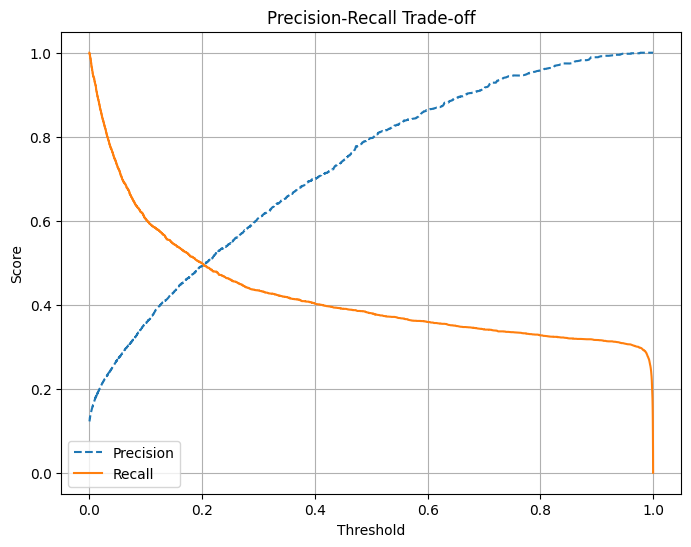

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Get precision-recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label="Precision", linestyle="--")
plt.plot(thresholds, recall[:-1], label="Recall", linestyle="-")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Trade-off")
plt.legend()
plt.grid()
plt.show()


### KNeighborsClassifier

We ran KNeighbors (KNN) classification and observed that it achieved the highest recall (75.05%) among all models tested. This means it correctly identifies the largest number of patients likely to be hospitalized, which is critical for minimizing financial risk in healthcare insurance underwriting. However, despite its high recall, KNN has serious drawbacks that make it a poor choice for the business case:

- Very low precission of 18.95%, meaning that around 81% of flagged high-risk patients will not actually be hospitalized, leading to excessive false positives. Denying most of the policies leading to losing business and 
- F1-score of 30.26%, weak balance between recall and precision.
- Poor overall ability to distinguish between hospitalized and non-hospitalized patients.




In [ ]:
import os
import joblib
import json
from sklearn.neighbors import KNeighborsClassifier

# ✅ Define KNeighborsClassifier
selected_classifiers = {
    "KNeighbors": KNeighborsClassifier()
}

# ✅ Define hyperparameter grid for KNeighborsClassifier
selected_param_grids = {
    "KNeighbors": {
        'n_neighbors': [3, 5, 7, 9, 11, 15],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
}

# ✅ Run hyperparameter tuning
best_model, best_params, best_recall, results_df = find_best_model_for_recall(
    X_train_final, y_train, X_test_final, y_test, selected_param_grids, selected_classifiers, n_iter=10
)

# ✅ Define folder to save models
model_dir = "models_knn"
os.makedirs(model_dir, exist_ok=True)  # Create the folder if it doesn't exist

# ✅ Save the best KNN model
best_model_path = os.path.join(model_dir, "best_knn_model.pkl")
joblib.dump(best_model, best_model_path)
print(f"✅ Best KNN model saved at: {best_model_path}")

# ✅ Save best hyperparameters as a JSON file
best_params_path = os.path.join(model_dir, "best_knn_model_params.json")
with open(best_params_path, "w") as f:
    json.dump(best_params, f, indent=4)

print(f"✅ Best KNN model parameters saved at: {best_params_path}")

# ✅ Save results for analysis
results_csv_path = os.path.join(model_dir, "best_knn_model_results.csv")
results_df.to_csv(results_csv_path, index=False)

print(f"✅ Model performance results saved at: {results_csv_path}")



🔍 Tuning KNeighbors...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ KNeighbors - Recall: 0.7505, ROC AUC: 0.7157, Precision: 0.1895, F1-score: 0.3026, Accuracy: 0.5762 | Time: 1453.01s

🏆 Best Model Found:
📌 Model: KNeighbors
📊 Best Recall Score: 0.7505
⚙️ Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 9, 'metric': 'minkowski'}
✅ Best KNN model saved at: models_knn/best_knn_model.pkl
✅ Best KNN model parameters saved at: models_knn/best_knn_model_params.json
✅ Model performance results saved at: models_knn/best_knn_model_results.csv
